In [109]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text


Files found for training: ['05_Syllabus_ES_and_VLSID_2022_23.pdf', 'ADE.pdf', 'ADE2.pdf', 'ADE3.pdf', 'ADE4.pdf', 'ADE5.pdf', 'DBMS.pdf', 'DBMS2.pdf', 'DBMS3.PDF', 'DSA1.pdf', 'DSA2.pdf', 'DSA3.pdf', 'OS2.pdf', 'Object Oriented Programming Through JAVA.pdf', 'Syllabus-1-4.pdf', 'Syllabus-14-19.pdf', 'Syllabus-20-24.pdf', 'Syllabus-25-29.pdf', 'Syllabus-30-34.pdf', 'Syllabus-35-49.pdf', 'Syllabus-5-8.pdf', 'Syllabus-50-52.pdf', 'Syllabus-53-56.pdf', 'Syllabus-57-60.pdf', 'Syllabus-61-64.pdf', 'Syllabus-65-67.pdf', 'Syllabus-68-77.pdf', 'Syllabus-78-83.pdf', 'Syllabus-84-93.pdf', 'Syllabus-9-13.pdf', 'document1.pdf', 'document2.pdf', 'document3.pdf']
Number of texts: 33
Number of labels: 33


C:\Users\zeliqzayyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross-validation scores: [0.45454545 0.09090909 0.27272727]
Mean cross-validation accuracy: 27.27%
Model trained and saved successfully!


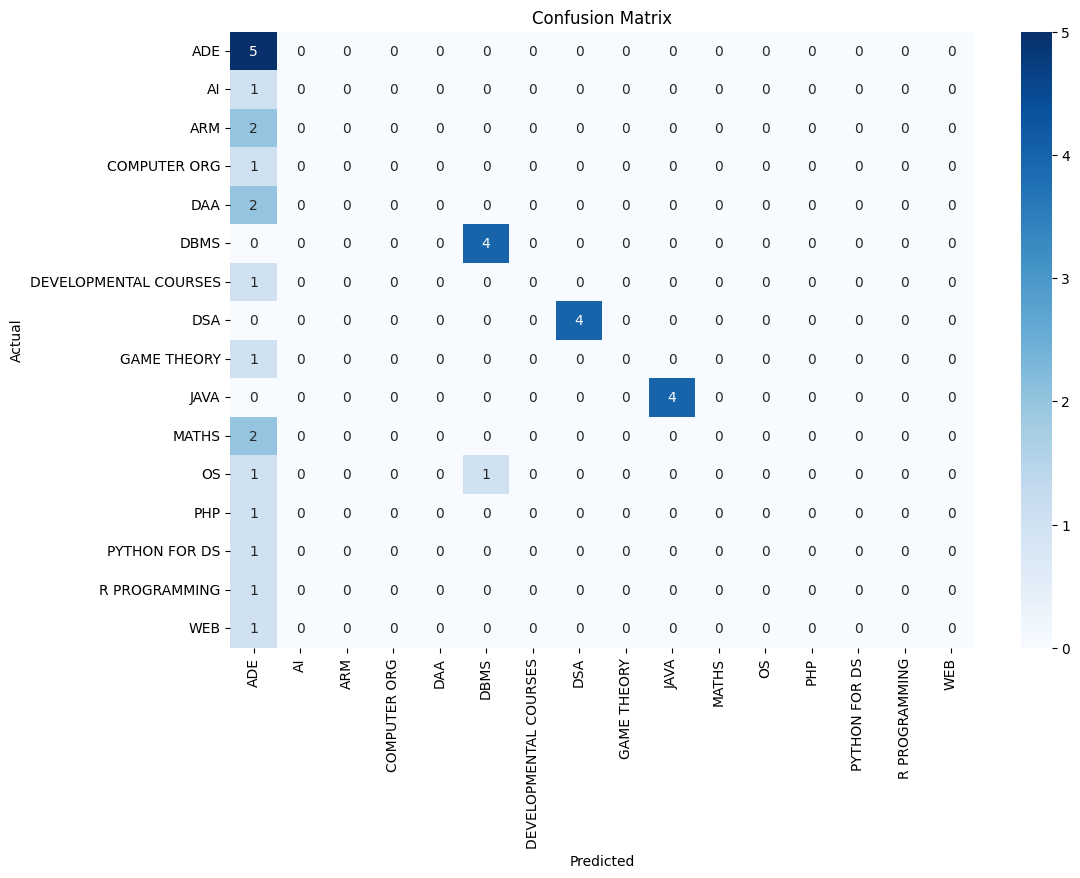

                       precision    recall  f1-score   support

                  ADE       0.25      1.00      0.40         5
                   AI       0.00      0.00      0.00         1
                  ARM       0.00      0.00      0.00         2
         COMPUTER ORG       0.00      0.00      0.00         1
                  DAA       0.00      0.00      0.00         2
                 DBMS       0.80      1.00      0.89         4
DEVELOPMENTAL COURSES       0.00      0.00      0.00         1
                  DSA       1.00      1.00      1.00         4
          GAME THEORY       0.00      0.00      0.00         1
                 JAVA       1.00      1.00      1.00         4
                MATHS       0.00      0.00      0.00         2
                   OS       0.00      0.00      0.00         2
                  PHP       0.00      0.00      0.00         1
        PYTHON FOR DS       0.00      0.00      0.00         1
        R PROGRAMMING       0.00      0.00      0.00  

In [115]:
import os
import fitz  # PyMuPDF for extracting text from PDFs
import joblib
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

# Collecting PDF files and extracting text
folder_path = 'Data'
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
files.sort()
print(f"Files found for training: {files}")

texts = []
for file in files:
    file_path = os.path.join(folder_path, file)
    text = extract_text_from_pdf(file_path)
    texts.append(text)

# Example labels for training data
labels = [
    'ARM', 'ADE', 'ADE','ADE', 'ADE', 'ADE', 'DBMS', 'DBMS', 'DBMS', 'DSA', 'DSA', 'DSA',
    'OS', 'JAVA', 'MATHS', 'DSA', 'JAVA', 'PYTHON FOR DS', 'R PROGRAMMING',
    'DEVELOPMENTAL COURSES', 'COMPUTER ORG', 'PHP', 'DAA', 'AI', 'DBMS', 'DAA',
    'MATHS', 'GAME THEORY', 'WEB', 'OS', 'JAVA', 'ARM', 'JAVA'
]

print(f"Number of texts: {len(texts)}")
print(f"Number of labels: {len(labels)}")

# Ensure the lengths of texts and labels match
if len(texts) != len(labels):
    raise ValueError("The number of texts and labels must be the same.")

# Create the model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Perform cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, texts, labels, cv=kf, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.2%}")

# Train the model on the entire dataset
model.fit(texts, labels)

# Save the trained model to a file
joblib.dump(model, 'classifier_model.pkl')

print("Model trained and saved successfully!")

# Confusion Matrix on the whole dataset
y_pred = model.predict(texts)
cm = confusion_matrix(labels, y_pred, labels=model.named_steps['multinomialnb'].classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.named_steps['multinomialnb'].classes_, yticklabels=model.named_steps['multinomialnb'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(labels, y_pred, zero_division=0))

In [116]:
# Load the model
# model = joblib.load('classifier_model.pkl')

def classify_text(text):
    return model.predict([text])[0]


In [120]:
from sklearn.metrics import accuracy_score, classification_report
def organize_files(pdf_path, base_output_dir):
    val = os.path.join("Test", pdf_path)
    print(f"Processing file: {val}")
    
    text = extract_text_from_pdf(val)
    category = classify_text(text)
    print(f"Classified as: {category}")

    output_dir = os.path.join(base_output_dir, category)
    os.makedirs(output_dir, exist_ok=True)
    
    shutil.move(val, os.path.join(output_dir, os.path.basename(pdf_path)))
    print(f"Moved to: {os.path.join(output_dir, os.path.basename(pdf_path))}")

# Example usage

test_data = 'Test'
pdf_files = [f for f in os.listdir(test_data) if os.path.isfile(os.path.join(test_data, f))]
base_output_dir = 'structured_documents'

for pdf_file in pdf_files:
    organize_files(pdf_file, base_output_dir)

Processing file: Test\ADE.pdf
MuPDF error: syntax error: invalid key in dict

Classified as: ADE
Moved to: structured_documents\ADE\ADE.pdf
Processing file: Test\document1.pdf
Classified as: JAVA
Moved to: structured_documents\JAVA\document1.pdf
Processing file: Test\document2.pdf
Classified as: ADE
Moved to: structured_documents\ADE\document2.pdf
Processing file: Test\document3.pdf
Classified as: JAVA
Moved to: structured_documents\JAVA\document3.pdf
Processing file: Test\DSA.pdf
Classified as: DSA
Moved to: structured_documents\DSA\DSA.pdf
Processing file: Test\JAVA.pdf
Classified as: JAVA
Moved to: structured_documents\JAVA\JAVA.pdf
